

# 1.   Import packages



In [ ]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline
import random
import os
import glob
import cv2
import datetime

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import InceptionV3
from keras.models import Model

from tensorflow.random import set_seed
from numpy.random import seed
seed(2022)
set_seed(2022)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
IMG_SIZE = 224
SEED = 2022
BATCH = 32

In [ ]:
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)

/device:GPU:0


2022-08-08 09:12:41.976368: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-08 09:12:41.976433: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
rm -rf ./logs/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/NEU/IE7615/Project/Dataset')
!ls

chest_xray  chest_xray.zip




# 2.   Import Dataset





In [ ]:
file_path = "../Dataset/chest_xray"

# split train and test
train_path = os.path.join(file_path,"train")
test_path=os.path.join(file_path,"test")

# split normal and pneumonia
train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

# split bacteria and virus
train_pneumonia_bacteria = glob.glob(train_path+"/PNEUMONIA/BACTERIA*.jpeg")
train_pneumonia_virus = glob.glob(train_path+"/PNEUMONIA/VIRUS*.jpeg")

test_pneumonia_bacteria = glob.glob(test_path+"/PNEUMONIA/BACTERIA*.jpeg")
test_pneumonia_virus = glob.glob(test_path+"/PNEUMONIA/VIRUS*.jpeg")

In [ ]:
train_normal

['../Dataset/chest_xray/train/NORMAL/NORMAL-2552119-0002.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORMAL-7298141-0001.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORMAL-3411116-0002.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORMAL-1619233-0001.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORMAL-7327513-0001.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORMAL-2699389-0001.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORMAL-3781678-0001.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORMAL-8648239-0002.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORMAL-5728847-0001.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORMAL-6881695-0001.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORMAL-8903542-0001.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORMAL-715046-0001.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORMAL-6084744-0001.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORMAL-4994733-0001.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORMAL-3853078-0002.jpeg',
 '../Dataset/chest_xray/train/NORMAL/NORM

In [ ]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

train_pneumonia_list = [x for x in train_pneumonia_bacteria]
train_pneumonia_list.extend([x for x in train_pneumonia_virus])

df_pneumonia_train = pd.DataFrame(np.concatenate([['Bacteria']*len(train_pneumonia_bacteria) , ['Virus']*len(train_pneumonia_virus)]), columns = ['class'])
df_pneumonia_train['image'] = [x for x in train_pneumonia_list]

test_pneumonia_list = [x for x in test_pneumonia_bacteria]
test_pneumonia_list.extend([x for x in test_pneumonia_virus])

df_pneumonia_test = pd.DataFrame(np.concatenate([['Bacteria']*len(test_pneumonia_bacteria) , ['Virus']*len(test_pneumonia_virus)]), columns = ['class'])
df_pneumonia_test['image'] = [x for x in test_pneumonia_list]

In [ ]:
df_train.head()

,class,image
0,Normal,../Dataset/chest_xray/train/NORMAL/NORMAL-2552...
1,Normal,../Dataset/chest_xray/train/NORMAL/NORMAL-7298...
2,Normal,../Dataset/chest_xray/train/NORMAL/NORMAL-3411...
3,Normal,../Dataset/chest_xray/train/NORMAL/NORMAL-1619...
4,Normal,../Dataset/chest_xray/train/NORMAL/NORMAL-7327...
...,...,...
5227,Pneumonia,../Dataset/chest_xray/train/PNEUMONIA/BACTERIA...
5228,Pneumonia,../Dataset/chest_xray/train/PNEUMONIA/BACTERIA...
5229,Pneumonia,../Dataset/chest_xray/train/PNEUMONIA/VIRUS-46...
5230,Pneumonia,../Dataset/chest_xray/train/PNEUMONIA/BACTERIA...


In [ ]:
df_test.head()

,class,image
0,Normal,../Dataset/chest_xray/test/NORMAL/NORMAL-86980...
1,Normal,../Dataset/chest_xray/test/NORMAL/NORMAL-50838...
2,Normal,../Dataset/chest_xray/test/NORMAL/NORMAL-57890...
3,Normal,../Dataset/chest_xray/test/NORMAL/NORMAL-41965...
4,Normal,../Dataset/chest_xray/test/NORMAL/NORMAL-65039...
...,...,...
619,Pneumonia,../Dataset/chest_xray/test/PNEUMONIA/BACTERIA-...
620,Pneumonia,../Dataset/chest_xray/test/PNEUMONIA/BACTERIA-...
621,Pneumonia,../Dataset/chest_xray/test/PNEUMONIA/VIRUS-436...
622,Pneumonia,../Dataset/chest_xray/test/PNEUMONIA/VIRUS-374...


In [ ]:
df_pneumonia_train.head()

,class,image
0,Bacteria,../Dataset/chest_xray/train/PNEUMONIA/BACTERIA...
1,Bacteria,../Dataset/chest_xray/train/PNEUMONIA/BACTERIA...
2,Bacteria,../Dataset/chest_xray/train/PNEUMONIA/BACTERIA...
3,Bacteria,../Dataset/chest_xray/train/PNEUMONIA/BACTERIA...
4,Bacteria,../Dataset/chest_xray/train/PNEUMONIA/BACTERIA...
...,...,...
3878,Virus,../Dataset/chest_xray/train/PNEUMONIA/VIRUS-61...
3879,Virus,../Dataset/chest_xray/train/PNEUMONIA/VIRUS-89...
3880,Virus,../Dataset/chest_xray/train/PNEUMONIA/VIRUS-52...
3881,Virus,../Dataset/chest_xray/train/PNEUMONIA/VIRUS-63...


In [ ]:
train = len(df_train)
test = len(df_test)
train_penu = len(df_pneumonia_train)
test_penu = len(df_pneumonia_test)

# 1. For classifying normal and penumonia
print('Total dataset:', train+test)
print('Training dataset:',train,round(train/(train+test),3)*100,'Percent')
print('Test dataset:', test,round(test/(train+test),3)*100,'Percent')

# 2. For classifying bacteria and virus
print('Total penumonia dataset:', train_penu + test_penu)
print('Training penumonia dataset:',train_penu,round(train_penu/(train_penu + test_penu),3)*100,'Percent')
print('Test penumonia dataset:', test_penu,round(test_penu/(train_penu + test_penu),3)*100,'Percent')

Total dataset: 5856
Training dataset: 5232 89.3 Percent
Test dataset: 624 10.7 Percent
Total penumonia dataset: 4273
Training penumonia dataset: 3883 90.9 Percent
Test penumonia dataset: 390 9.1 Percent




# 3.   Data visualization



Text(0.5, 1.0, 'Test set')

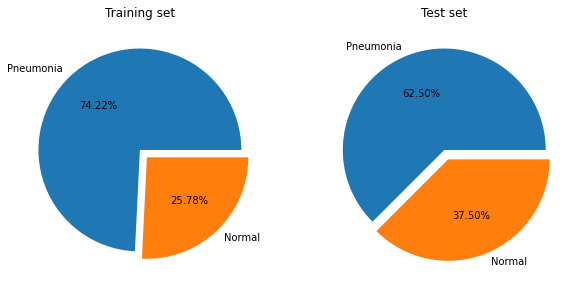

In [ ]:
# visualization more
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
plt.title('Distribution of classes',color='black',fontsize=15)

ax1.pie(df_train["class"].value_counts().values,labels=['Pneumonia', 'Normal'],autopct='%1.2f%%',explode=(0, 0.1))
ax1.set_title('Training set')

ax2.pie(df_test["class"].value_counts().values,labels=['Pneumonia', 'Normal'],autopct='%1.2f%%',explode=(0, 0.1))
ax2.set_title('Test set')

Train Set - Normal


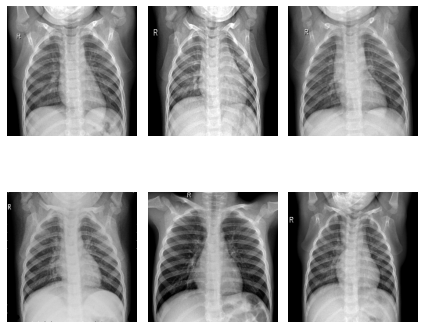

In [ ]:
# Visualize the normal class from training set
print('Train Set - Normal')

plt.figure(figsize=(6,6))

for i in range(0, 6):
    plt.subplot(2,3,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Pneumonia


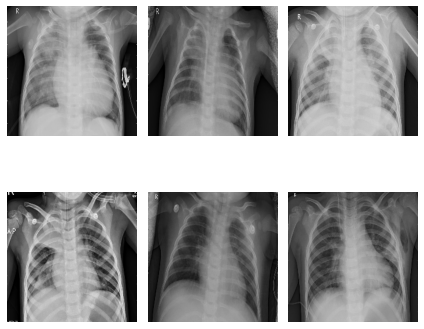

In [ ]:
# Visualize the pneumonia class from training set
print('Train Set - Pneumonia')

plt.figure(figsize=(6,6))

for i in range(0, 6):
    plt.subplot(2,3,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()



# 4. Data Preprocessing





## 4.1   Split into training data and validation data



In [ ]:
# split training data and validation data
# for data 1
train_df, val_df = train_test_split(df_train, 
                                    test_size = 0.20, 
                                    random_state = SEED, 
                                    stratify = df_train['class'])

In [ ]:
# split training data and validation data
# for data 2
train_pneumonia_df, val_pneumonia_df = train_test_split(df_pneumonia_train, 
                                    test_size = 0.20, 
                                    random_state = SEED, 
                                    stratify = df_pneumonia_train['class'])

In [ ]:
print('Total training set:', train)
print('Training dataset:',len(train_df),'Normal',len(train_df[train_df['class']=='Normal']),'Pneumonia',len(train_df[train_df['class']=='Pneumonia']))
print('Validation dataset:', len(val_df),'Normal',len(val_df[val_df['class']=='Normal']),'Pneumonia',len(val_df[val_df['class']=='Pneumonia']))

Total training set: 5232
Training dataset: 4185 Normal 1079 Pneumonia 3106
Validation dataset: 1047 Normal 270 Pneumonia 777


In [ ]:
print('Total penumonia training set:', train_penu)
print('Training dataset:',len(train_pneumonia_df),
      'Bacteria',len(train_pneumonia_df[train_pneumonia_df['class']=='Bacteria']),
      'virus',len(train_pneumonia_df[train_pneumonia_df['class']=='Virus']))
print('Validation dataset:',len(val_pneumonia_df),
      'Bacteria',len(val_pneumonia_df[val_pneumonia_df['class']=='Bacteria']),
      'virus',len(val_pneumonia_df[val_pneumonia_df['class']=='Virus']))

Total penumonia training set: 3883
Training dataset: 3106 Bacteria 2030 virus 1076
Validation dataset: 777 Bacteria 508 virus 269


## 4.2   Balance in the training set

In [ ]:
# balance percentage of NORMAL and PENUMONIA in the training set 
normal_df = train_df[train_df['class']=='Normal']
fillup = len(train_df) - len(normal_df) * 2
for i in range(fillup):
  train_df = train_df.append(normal_df.sample(1))

In [ ]:
# balance percentage of Bacteria and Virus in the training set 
virus_pneumonia_df = train_pneumonia_df[train_pneumonia_df['class']=='Virus']
fillup = len(train_pneumonia_df) - len(virus_pneumonia_df) * 2
for i in range(fillup):
  train_pneumonia_df = train_pneumonia_df.append(virus_pneumonia_df.sample(1))

In [ ]:
print('Total training set:', train)
print('Training dataset:',len(train_df),'Normal',len(train_df[train_df['class']=='Normal']),'Pneumonia',len(train_df[train_df['class']=='Pneumonia']))
print('Validation dataset:', len(val_df),'Normal',len(val_df[val_df['class']=='Normal']),'Pneumonia',len(val_df[val_df['class']=='Pneumonia']))

Total training set: 5232
Training dataset: 6212 Normal 3106 Pneumonia 3106
Validation dataset: 1047 Normal 270 Pneumonia 777


In [ ]:
print('Total penumonia training set:', train_penu)
print('Training dataset:',len(train_pneumonia_df),
      'Bacteria',len(train_pneumonia_df[train_pneumonia_df['class']=='Bacteria']),
      'virus',len(train_pneumonia_df[train_pneumonia_df['class']=='Virus']))
print('Validation dataset:',len(val_pneumonia_df),
      'Bacteria',len(val_pneumonia_df[val_pneumonia_df['class']=='Bacteria']),
      'virus',len(val_pneumonia_df[val_pneumonia_df['class']=='Virus']))

Total penumonia training set: 3883
Training dataset: 4060 Bacteria 2030 virus 2030
Validation dataset: 777 Bacteria 508 virus 269


## 4.3   Data Augmentation

In [ ]:
# Create generator for training and test sets
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  rotation_range = 90,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Data augmentation
# Data 1
ds_train = train_datagen.flow_from_dataframe(train_df,
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 6212 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [ ]:
# Data 2
ds_pneumonia_train = train_datagen.flow_from_dataframe(train_pneumonia_df,
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_pneumonia_val = val_datagen.flow_from_dataframe(val_pneumonia_df,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1, 
                                            seed = SEED)

ds_pneumonia_test = val_datagen.flow_from_dataframe(df_pneumonia_test,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4060 validated image filenames belonging to 2 classes.
Found 777 validated image filenames belonging to 2 classes.
Found 390 validated image filenames belonging to 2 classes.


After Augmentation


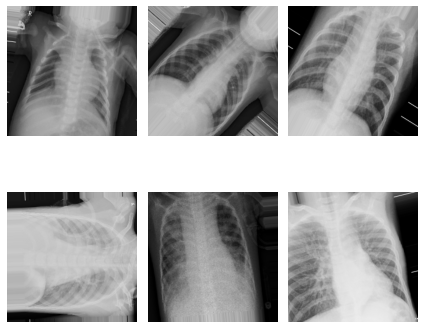

In [ ]:
print('After Augmentation')

plt.figure(figsize=(6,6))

for i in range(0, 6):
    plt.subplot(2,3,i + 1)
    img = cv2.resize(ds_train[0][0][i], (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

# ----------------Classifying Data 1 (Normal/Penumonia)----------------

# 5.   Design CNN model(normal/penumonia)

## 5.1   Model Structure

In [ ]:
def get_model():
    
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # first block
    x = layers.Conv2D(filters=16, kernel_size=3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # second block
    x = layers.Conv2D(filters=32, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # third block
    x = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)
    # head layer
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    # output
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [ ]:
keras.backend.clear_session()

cnn_model = get_model()
cnn_model.compile(loss='binary_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate=3e-5),
              metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

cnn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640  

2022-08-07 23:25:37.700042: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-07 23:25:37.700080: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
)

In [ ]:
log_dir="logs/fit/1st/cnn/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-07 23:25:48.935993: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-07 23:25:48.936026: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-07 23:25:48.936961: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
cnn_history = cnn_model.fit(ds_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/1));

2022-08-07 23:26:04.542475: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2022-08-07 23:26:04.789952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/194 [..............................] - ETA: 3:12 - loss: 1.2626 - auc: 0.5952 - binary_accuracy: 0.5312

2022-08-07 23:26:05.569919: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-07 23:26:05.569931: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


  2/194 [..............................] - ETA: 1:03 - loss: 1.2612 - auc: 0.5579 - binary_accuracy: 0.5625

2022-08-07 23:26:05.889846: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-07 23:26:05.893060: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-07 23:26:05.898234: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/1st/cnn/20220807-232548/train/plugins/profile/2022_08_07_23_26_05

2022-08-07 23:26:05.899061: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/1st/cnn/20220807-232548/train/plugins/profile/2022_08_07_23_26_05/ImbaJades-MBP.local.trace.json.gz
2022-08-07 23:26:05.901778: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/1st/cnn/20220807-232548/train/plugins/profile/2022_08_07_23_26_05

2022-08-07 23:26:05.902194: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/fit/1st/cnn/2022

195/194 [==============================] - ETA: 0s - loss: 0.6203 - auc: 0.7442 - binary_accuracy: 0.6819

2022-08-07 23:27:14.830268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


194/194 [==============================] - 78s 398ms/step - loss: 0.6203 - auc: 0.7442 - binary_accuracy: 0.6819 - val_loss: 0.5976 - val_auc: 0.8237 - val_binary_accuracy: 0.7421
Epoch 2/50
194/194 [==============================] - 77s 394ms/step - loss: 0.3924 - auc: 0.9029 - binary_accuracy: 0.8307 - val_loss: 0.5990 - val_auc: 0.9435 - val_binary_accuracy: 0.7421
Epoch 3/50
194/194 [==============================] - 78s 403ms/step - loss: 0.3152 - auc: 0.9384 - binary_accuracy: 0.8712 - val_loss: 0.3205 - val_auc: 0.9601 - val_binary_accuracy: 0.8281
Epoch 4/50
194/194 [==============================] - 80s 411ms/step - loss: 0.2695 - auc: 0.9537 - binary_accuracy: 0.8957 - val_loss: 0.2483 - val_auc: 0.9597 - val_binary_accuracy: 0.9112
Epoch 5/50
194/194 [==============================] - 80s 409ms/step - loss: 0.2553 - auc: 0.9583 - binary_accuracy: 0.9061 - val_loss: 0.4620 - val_auc: 0.9636 - val_binary_accuracy: 0.7889
Epoch 6/50
194/194 [==============================] - 77

## 5.2   Model Evaluation

In [ ]:
score = cnn_model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.3032712936401367
Test auc: 0.9525367021560669
Test accuracy: 0.8958333730697632


In [ ]:
score = cnn_model.evaluate(ds_val, steps = len(val_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.2482636421918869
Val auc: 0.9597097039222717
Val accuracy: 0.9111747741699219


In [ ]:
y_pred = np.round(cnn_model.predict(ds_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_test.labels, y_pred_))

2022-08-07 23:38:00.468674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.9210206561360876
Precision-Score:  0.8752886836027713
Recall-Score:  0.9717948717948718


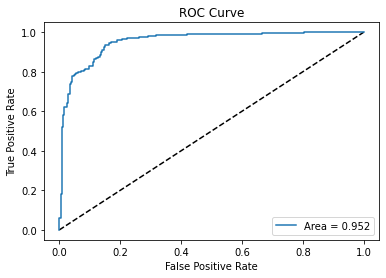

In [ ]:
y_pred_r=cnn_model.predict(ds_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# 6.   Transfer learning (Resnet)

In [ ]:
base_model_r = tf.keras.applications.ResNet152V2(weights='imagenet',
                                                 input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                                 include_top=False)

base_model_r.trainable = False

def resnet_get_pretrained():
    
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model_r(inputs)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [ ]:
keras.backend.clear_session()

model_pretrained_r = resnet_get_pretrained()
model_pretrained_r.compile(loss='binary_crossentropy',
                           optimizer = keras.optimizers.Adam(learning_rate=5e-5),
                           metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

model_pretrained_r.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 58,594,049
Trainable params: 262,401
Non-trainable params: 58,331,648
___________________________________________

In [ ]:
log_dir="logs/fit/1st/resnet/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-07 23:38:10.057228: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-07 23:38:10.057238: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-07 23:38:10.057263: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
history_r = model_pretrained_r.fit(ds_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/1));

Epoch 1/50


2022-08-07 23:38:12.367570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/194 [..............................] - ETA: 10:57 - loss: 1.0654 - auc: 0.5176 - binary_accuracy: 0.4688

2022-08-07 23:38:13.958395: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-07 23:38:13.958412: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


  2/194 [..............................] - ETA: 2:35 - loss: 0.9227 - auc: 0.5547 - binary_accuracy: 0.5469 

2022-08-07 23:38:14.798658: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-07 23:38:14.799193: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-07 23:38:14.799949: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/1st/resnet/20220807-233810/train/plugins/profile/2022_08_07_23_38_14

2022-08-07 23:38:14.800876: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/1st/resnet/20220807-233810/train/plugins/profile/2022_08_07_23_38_14/ImbaJades-MBP.local.trace.json.gz
2022-08-07 23:38:14.801814: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/1st/resnet/20220807-233810/train/plugins/profile/2022_08_07_23_38_14

2022-08-07 23:38:14.802043: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/fit/1st

195/194 [==============================] - ETA: 0s - loss: 0.3973 - auc: 0.9065 - binary_accuracy: 0.8279

2022-08-07 23:40:28.992746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


194/194 [==============================] - 173s 881ms/step - loss: 0.3973 - auc: 0.9065 - binary_accuracy: 0.8279 - val_loss: 0.2505 - val_auc: 0.9748 - val_binary_accuracy: 0.8988
Epoch 2/50
194/194 [==============================] - 170s 873ms/step - loss: 0.2316 - auc: 0.9678 - binary_accuracy: 0.9184 - val_loss: 0.1828 - val_auc: 0.9809 - val_binary_accuracy: 0.9303
Epoch 3/50
194/194 [==============================] - 170s 874ms/step - loss: 0.2009 - auc: 0.9744 - binary_accuracy: 0.9301 - val_loss: 0.1745 - val_auc: 0.9840 - val_binary_accuracy: 0.9360
Epoch 4/50
194/194 [==============================] - 171s 878ms/step - loss: 0.1778 - auc: 0.9804 - binary_accuracy: 0.9369 - val_loss: 0.1781 - val_auc: 0.9853 - val_binary_accuracy: 0.9341
Epoch 5/50
194/194 [==============================] - 170s 875ms/step - loss: 0.1704 - auc: 0.9813 - binary_accuracy: 0.9395 - val_loss: 0.2046 - val_auc: 0.9868 - val_binary_accuracy: 0.9179

Epoch 00005: ReduceLROnPlateau reducing learning r

In [ ]:
score = model_pretrained_r.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.23963241279125214
Test auc: 0.9624315500259399
Test accuracy: 0.9150640964508057


In [ ]:
score = model_pretrained_r.evaluate(ds_val, steps = len(val_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.16191670298576355
Val auc: 0.9869083762168884
Val accuracy: 0.9417383074760437


In [ ]:
y_pred = np.round(model_pretrained_r.predict(ds_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_test.labels, y_pred_))

2022-08-08 00:19:25.293151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.933997509339975
Precision-Score:  0.9079903147699758
Recall-Score:  0.9615384615384616


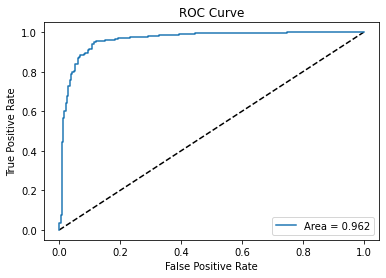

In [ ]:
y_pred_r=model_pretrained_r.predict(ds_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# 7.   Fine Tuning(Resnet)

In [ ]:
base_model_r.trainable = True

for layer in base_model_r.layers[:-13]:
    layer.trainable = False

model_pretrained_r_ft = resnet_get_pretrained()
model_pretrained_r_ft.compile(loss='binary_crossentropy',
                         optimizer = keras.optimizers.Adam(learning_rate=1e-6), # very low learning rate
                         metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

model_pretrained_r_ft.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 58,594,049
Trainable params: 4,731,137
Non-trainable params: 53,862,912
_______________________________________

In [ ]:
log_dir="logs/fit/1st/resnet_ft/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-08 09:14:31.038823: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 09:14:31.038843: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 09:14:31.039243: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
history_r_ft = model_pretrained_r_ft.fit(ds_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/1))

2022-08-08 09:14:37.121157: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2022-08-08 09:14:39.106054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/194 [..............................] - ETA: 11:31 - loss: 0.7861 - auc: 0.3125 - binary_accuracy: 0.5625

2022-08-08 09:14:40.817148: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 09:14:40.817163: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


  2/194 [..............................] - ETA: 2:45 - loss: 0.8015 - auc: 0.3457 - binary_accuracy: 0.5312 

2022-08-08 09:14:41.572037: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-08 09:14:41.572721: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-08 09:14:41.574002: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/1st/resnet_ft/20220808-091431/train/plugins/profile/2022_08_08_09_14_41

2022-08-08 09:14:41.574589: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/1st/resnet_ft/20220808-091431/train/plugins/profile/2022_08_08_09_14_41/ImbaJades-MBP.local.trace.json.gz
2022-08-08 09:14:41.575721: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/1st/resnet_ft/20220808-091431/train/plugins/profile/2022_08_08_09_14_41

2022-08-08 09:14:41.575851: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to log

195/194 [==============================] - ETA: 0s - loss: 0.7378 - auc: 0.5286 - binary_accuracy: 0.5259

2022-08-08 09:17:04.956770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


194/194 [==============================] - 183s 930ms/step - loss: 0.7378 - auc: 0.5286 - binary_accuracy: 0.5259 - val_loss: 0.5770 - val_auc: 0.6641 - val_binary_accuracy: 0.7240
Epoch 2/50
194/194 [==============================] - 175s 902ms/step - loss: 0.6179 - auc: 0.7650 - binary_accuracy: 0.6774 - val_loss: 0.5425 - val_auc: 0.8314 - val_binary_accuracy: 0.7937
Epoch 3/50
194/194 [==============================] - 176s 904ms/step - loss: 0.5469 - auc: 0.8678 - binary_accuracy: 0.7907 - val_loss: 0.5050 - val_auc: 0.9051 - val_binary_accuracy: 0.8223
Epoch 4/50
194/194 [==============================] - 176s 905ms/step - loss: 0.4884 - auc: 0.9160 - binary_accuracy: 0.8432 - val_loss: 0.4642 - val_auc: 0.9403 - val_binary_accuracy: 0.8596
Epoch 5/50
194/194 [==============================] - 175s 901ms/step - loss: 0.4415 - auc: 0.9375 - binary_accuracy: 0.8775 - val_loss: 0.4277 - val_auc: 0.9554 - val_binary_accuracy: 0.8644
Epoch 6/50
194/194 [==============================]

In [ ]:
score = model_pretrained_r_ft.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.26345744729042053
Test auc: 0.9548159241676331
Test accuracy: 0.8958333730697632


In [ ]:
score = model_pretrained_r_ft.evaluate(ds_val, steps = len(val_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.20915265381336212
Val auc: 0.9843939542770386
Val accuracy: 0.9264565110206604


In [ ]:
y_pred = np.round(model_pretrained_r_ft.predict(ds_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_test.labels, y_pred_))

2022-08-08 10:54:06.624618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.9192546583850931
Precision-Score:  0.891566265060241
Recall-Score:  0.9487179487179487


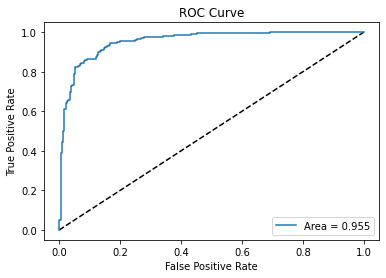

In [ ]:
y_pred_r=model_pretrained_r_ft.predict(ds_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# 6.   Transfer learning (Inception)

In [ ]:
base_model_i = InceptionV3(weights='imagenet',
                           input_shape=(IMG_SIZE, IMG_SIZE, 3),
                           include_top=False) 

base_model_i.trainable = False

def inception_get_pretrained():

    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model_i(inputs)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [ ]:
keras.backend.clear_session()

model_pretrained_i = inception_get_pretrained()
model_pretrained_i.compile(loss='binary_crossentropy',
                           optimizer = keras.optimizers.Adam(learning_rate=5e-5),
                           metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

model_pretrained_i.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 22,065,185
Trainable params: 262,401
Non-trainable params: 21,802,784
___________________________________________

In [ ]:
log_dir="logs/fit/1st/inception/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-08 02:21:33.148078: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 02:21:33.148085: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 02:21:33.148099: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
history_i = model_pretrained_i.fit(ds_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/1));

Epoch 1/50


2022-08-08 02:21:34.479475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  2/194 [..............................] - ETA: 46s - loss: 0.6060 - auc: 0.7443 - binary_accuracy: 0.6250 

2022-08-08 02:21:35.883490: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 02:21:35.883504: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 02:21:36.334814: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-08 02:21:36.335323: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-08 02:21:36.336045: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/1st/inception/20220808-022133/train/plugins/profile/2022_08_08_02_21_36

2022-08-08 02:21:36.339057: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/1st/inception/20220808-022133/train/plugins/profile/2022_08_08_02_21_36/ImbaJades-MBP.local.trace.json.gz
2022-08-08 02:21:36.339722: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: lo

195/194 [==============================] - ETA: 0s - loss: 0.3615 - auc: 0.9284 - binary_accuracy: 0.8511

2022-08-08 02:22:49.852110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


194/194 [==============================] - 95s 479ms/step - loss: 0.3615 - auc: 0.9284 - binary_accuracy: 0.8511 - val_loss: 0.3876 - val_auc: 0.9454 - val_binary_accuracy: 0.8271
Epoch 2/50
194/194 [==============================] - 88s 453ms/step - loss: 0.2598 - auc: 0.9607 - binary_accuracy: 0.8971 - val_loss: 0.2790 - val_auc: 0.9570 - val_binary_accuracy: 0.8844
Epoch 3/50
194/194 [==============================] - 88s 454ms/step - loss: 0.2277 - auc: 0.9693 - binary_accuracy: 0.9131 - val_loss: 0.4078 - val_auc: 0.9627 - val_binary_accuracy: 0.8090
Epoch 4/50
194/194 [==============================] - 88s 453ms/step - loss: 0.2160 - auc: 0.9721 - binary_accuracy: 0.9163 - val_loss: 0.3874 - val_auc: 0.9635 - val_binary_accuracy: 0.8185

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 5/50
194/194 [==============================] - 88s 456ms/step - loss: 0.2017 - auc: 0.9758 - binary_accuracy: 0.9258 - val_loss: 0.2883 - val_auc: 0.9649 - val

In [ ]:
score = model_pretrained_i.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.39459919929504395
Test auc: 0.8951238393783569
Test accuracy: 0.8285256624221802


In [ ]:
score = model_pretrained_i.evaluate(ds_val, steps = len(val_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.27897778153419495
Val auc: 0.9570094347000122
Val accuracy: 0.8844317197799683


In [ ]:
y_pred = np.round(model_pretrained_i.predict(ds_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_test.labels, y_pred_))

2022-08-08 02:32:35.909336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.8699878493317132
Precision-Score:  0.8267898383371824
Recall-Score:  0.9179487179487179


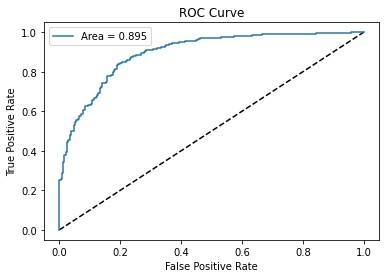

In [ ]:
y_pred_r=model_pretrained_i.predict(ds_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# 7.   Fine Tuning(Inception)

In [ ]:
base_model_i.trainable = True

for layer in base_model_i.layers[:-13]:
    layer.trainable = False
    
model_pretrained_i_ft = inception_get_pretrained()

model_pretrained_i_ft.compile(loss='binary_crossentropy',
                         optimizer = keras.optimizers.Adam(learning_rate=1e-6), # very low learning rate
                         metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

model_pretrained_i_ft.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 22,065,185
Trainable params: 656,513
Non-trainable params: 21,408,672
_________________________________________

In [ ]:
log_dir="logs/fit/1st/inception_ft/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-08 02:32:53.932282: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 02:32:53.932292: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 02:32:53.933027: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
history_i_ft = model_pretrained_i_ft.fit(ds_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/1))

Epoch 1/50


2022-08-08 02:32:55.477966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  2/194 [..............................] - ETA: 47s - loss: 0.7717 - auc: 0.5083 - binary_accuracy: 0.5000 

2022-08-08 02:32:56.860549: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 02:32:56.860562: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 02:32:57.231376: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-08 02:32:57.231973: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-08 02:32:57.232688: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/1st/inception_ft/20220808-023253/train/plugins/profile/2022_08_08_02_32_57

2022-08-08 02:32:57.234181: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/1st/inception_ft/20220808-023253/train/plugins/profile/2022_08_08_02_32_57/ImbaJades-MBP.local.trace.json.gz
2022-08-08 02:32:57.234761: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directo

195/194 [==============================] - ETA: 0s - loss: 0.6996 - auc: 0.5944 - binary_accuracy: 0.5567

2022-08-08 02:34:10.940428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


194/194 [==============================] - 96s 485ms/step - loss: 0.6996 - auc: 0.5944 - binary_accuracy: 0.5567 - val_loss: 0.6612 - val_auc: 0.5057 - val_binary_accuracy: 0.5855
Epoch 2/50
194/194 [==============================] - 88s 452ms/step - loss: 0.6374 - auc: 0.6916 - binary_accuracy: 0.6367 - val_loss: 0.6692 - val_auc: 0.6105 - val_binary_accuracy: 0.5836
Epoch 3/50
194/194 [==============================] - 89s 456ms/step - loss: 0.5826 - auc: 0.7871 - binary_accuracy: 0.7086 - val_loss: 0.6486 - val_auc: 0.7070 - val_binary_accuracy: 0.6189
Epoch 4/50
194/194 [==============================] - 88s 452ms/step - loss: 0.5457 - auc: 0.8361 - binary_accuracy: 0.7569 - val_loss: 0.6249 - val_auc: 0.7769 - val_binary_accuracy: 0.6571
Epoch 5/50
194/194 [==============================] - 89s 456ms/step - loss: 0.5130 - auc: 0.8656 - binary_accuracy: 0.7824 - val_loss: 0.6075 - val_auc: 0.8251 - val_binary_accuracy: 0.6743
Epoch 6/50
194/194 [==============================] - 88

In [ ]:
score = model_pretrained_i_ft.evaluate(ds_val, steps = len(val_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.34139135479927063
Val auc: 0.9661566615104675
Val accuracy: 0.8471823930740356


In [ ]:
score = model_pretrained_i_ft.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.36267733573913574
Test auc: 0.9233070611953735
Test accuracy: 0.8477564454078674


In [ ]:
y_pred = np.round(model_pretrained_i_ft.predict(ds_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_test.labels, y_pred_))

2022-08-08 03:36:44.405788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.8745046235138706
Precision-Score:  0.9019073569482289
Recall-Score:  0.8487179487179487


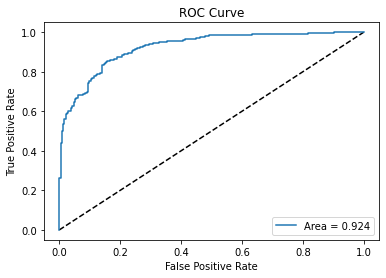

In [ ]:
y_pred_r=model_pretrained_i_ft.predict(ds_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# 6.   Transfer learning (VGG)

In [ ]:
base_model_v = VGG16(weights='imagenet',
                           input_shape=(IMG_SIZE, IMG_SIZE, 3),
                           include_top=False)

base_model_v.trainable = False

def vgg_get_pretrained():
    
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model_v(inputs)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [ ]:
keras.backend.clear_session()

model_pretrained_v = vgg_get_pretrained()
model_pretrained_v.compile(loss='binary_crossentropy',
                           optimizer = keras.optimizers.Adam(learning_rate=5e-5),
                           metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

model_pretrained_v.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 14,780,481
Trainable params: 65,793
Non-trainable params: 14,714,688
____________________________________________

In [ ]:
log_dir="logs/fit/1st/vgg/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-08 03:37:02.930895: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 03:37:02.930903: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 03:37:02.930916: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
history_v = model_pretrained_v.fit(ds_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/1));

Epoch 1/50


2022-08-08 03:37:03.478824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/194 [..............................] - ETA: 4:21 - loss: 0.6752 - auc: 0.5804 - binary_accuracy: 0.5000

2022-08-08 03:37:04.645237: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 03:37:04.645247: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


  2/194 [..............................] - ETA: 1:52 - loss: 0.6990 - auc: 0.5093 - binary_accuracy: 0.4844

2022-08-08 03:37:05.342554: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-08 03:37:05.343095: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-08 03:37:05.343839: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/1st/vgg/20220808-033702/train/plugins/profile/2022_08_08_03_37_05

2022-08-08 03:37:05.344661: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/1st/vgg/20220808-033702/train/plugins/profile/2022_08_08_03_37_05/ImbaJades-MBP.local.trace.json.gz
2022-08-08 03:37:05.345219: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/1st/vgg/20220808-033702/train/plugins/profile/2022_08_08_03_37_05

2022-08-08 03:37:05.345635: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/fit/1st/vgg/2022

195/194 [==============================] - ETA: 0s - loss: 0.6743 - auc: 0.6203 - binary_accuracy: 0.5832

2022-08-08 03:38:52.044153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


194/194 [==============================] - 133s 679ms/step - loss: 0.6743 - auc: 0.6203 - binary_accuracy: 0.5832 - val_loss: 0.6074 - val_auc: 0.9189 - val_binary_accuracy: 0.8634
Epoch 2/50
194/194 [==============================] - 140s 722ms/step - loss: 0.5870 - auc: 0.8707 - binary_accuracy: 0.7943 - val_loss: 0.5529 - val_auc: 0.9279 - val_binary_accuracy: 0.8243
Epoch 3/50
194/194 [==============================] - 132s 678ms/step - loss: 0.5174 - auc: 0.9167 - binary_accuracy: 0.8582 - val_loss: 0.4884 - val_auc: 0.9292 - val_binary_accuracy: 0.8472
Epoch 4/50
194/194 [==============================] - 131s 675ms/step - loss: 0.4632 - auc: 0.9291 - binary_accuracy: 0.8741 - val_loss: 0.4593 - val_auc: 0.9305 - val_binary_accuracy: 0.8262
Epoch 5/50
194/194 [==============================] - 131s 675ms/step - loss: 0.4221 - auc: 0.9320 - binary_accuracy: 0.8804 - val_loss: 0.4418 - val_auc: 0.9316 - val_binary_accuracy: 0.8204
Epoch 6/50
194/194 [==============================]

In [ ]:
score = model_pretrained_v.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.35313281416893005
Test auc: 0.9242056012153625
Test accuracy: 0.8493589758872986


In [ ]:
score = model_pretrained_v.evaluate(ds_val, steps = len(val_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.35493239760398865
Val auc: 0.9439535140991211
Val accuracy: 0.8443170785903931


In [ ]:
y_pred = np.round(model_pretrained_v.predict(ds_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_test.labels, y_pred_))

2022-08-08 04:21:47.923653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.8763157894736842
Precision-Score:  0.9
Recall-Score:  0.8538461538461538


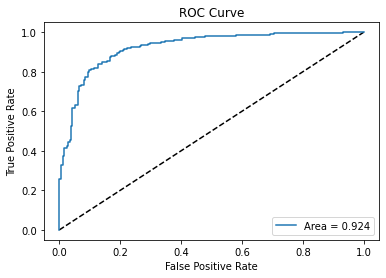

In [ ]:
y_pred_r=model_pretrained_v.predict(ds_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# 7.   Fine Tuning(VGG)

In [ ]:
base_model_v.trainable = True

for layer in base_model_v.layers[:-13]:
    layer.trainable = False

model_pretrained_v_ft = vgg_get_pretrained()
model_pretrained_v_ft.compile(loss='binary_crossentropy',
                         optimizer = keras.optimizers.Adam(learning_rate=1e-6), # very low learning rate
                         metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

model_pretrained_v_ft.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 14,780,481
Trainable params: 14,520,321
Non-trainable params: 260,160
_________________________________________

In [ ]:
log_dir="logs/fit/1st/vgg_ft/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-08 10:54:43.889367: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 10:54:43.889376: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 10:54:43.889392: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
history_v_ft = model_pretrained_v_ft.fit(ds_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/1))

Epoch 1/50


2022-08-08 10:54:44.527984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/194 [..............................] - ETA: 7:10 - loss: 0.8773 - auc: 0.6450 - binary_accuracy: 0.3438

2022-08-08 10:54:46.550964: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 10:54:46.550988: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


  2/194 [..............................] - ETA: 4:48 - loss: 0.8322 - auc: 0.5390 - binary_accuracy: 0.4219

2022-08-08 10:54:48.274864: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-08 10:54:48.275419: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-08 10:54:48.276160: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/1st/vgg_ft/20220808-105443/train/plugins/profile/2022_08_08_10_54_48

2022-08-08 10:54:48.277968: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/1st/vgg_ft/20220808-105443/train/plugins/profile/2022_08_08_10_54_48/ImbaJades-MBP.local.trace.json.gz
2022-08-08 10:54:48.278536: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/1st/vgg_ft/20220808-105443/train/plugins/profile/2022_08_08_10_54_48

2022-08-08 10:54:48.278667: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/fit/1st

195/194 [==============================] - ETA: -1s - loss: 0.5588 - auc: 0.8335 - binary_accuracy: 0.7590

2022-08-08 10:59:30.086269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


194/194 [==============================] - 309s 2s/step - loss: 0.5588 - auc: 0.8335 - binary_accuracy: 0.7590 - val_loss: 0.5289 - val_auc: 0.9004 - val_binary_accuracy: 0.7794
Epoch 2/50
194/194 [==============================] - 308s 2s/step - loss: 0.3460 - auc: 0.9368 - binary_accuracy: 0.8923 - val_loss: 0.4827 - val_auc: 0.9243 - val_binary_accuracy: 0.8090
Epoch 3/50
194/194 [==============================] - 307s 2s/step - loss: 0.2755 - auc: 0.9501 - binary_accuracy: 0.9068 - val_loss: 0.4296 - val_auc: 0.9477 - val_binary_accuracy: 0.8300
Epoch 4/50
194/194 [==============================] - 307s 2s/step - loss: 0.2283 - auc: 0.9657 - binary_accuracy: 0.9213 - val_loss: 0.3068 - val_auc: 0.9711 - val_binary_accuracy: 0.8644
Epoch 5/50
194/194 [==============================] - 307s 2s/step - loss: 0.1952 - auc: 0.9758 - binary_accuracy: 0.9309 - val_loss: 0.3597 - val_auc: 0.9807 - val_binary_accuracy: 0.8500
Epoch 6/50
194/194 [==============================] - 308s 2s/step

In [ ]:
score = model_pretrained_v_ft.evaluate(ds_val, steps = len(val_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.30675598978996277
Val auc: 0.9711472988128662
Val accuracy: 0.8643743991851807


In [ ]:
score = model_pretrained_v_ft.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.285700261592865
Test auc: 0.9473318457603455
Test accuracy: 0.8782051205635071


In [ ]:
y_pred = np.round(model_pretrained_v_ft.predict(ds_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_test.labels, y_pred_))

2022-08-08 11:41:31.678013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.9020618556701031
Precision-Score:  0.9067357512953368
Recall-Score:  0.8974358974358975


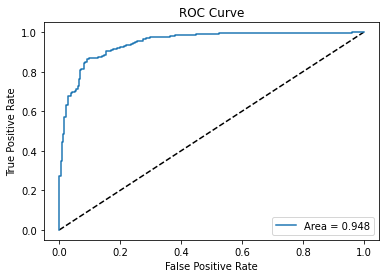

In [ ]:
y_pred_r=model_pretrained_v_ft.predict(ds_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# ----------------Classifying Data 2 (Bacteria/Virus)----------------

# 5.   Design CNN model(Bacteria/virus)

In [ ]:
def get_model():
    
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # first block
    x = layers.Conv2D(filters=16, kernel_size=3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # second block
    x = layers.Conv2D(filters=32, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # third block
    x = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)
    
    # forth block
    x = layers.Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    # output layer
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [ ]:
keras.backend.clear_session()

cnn_model_2nd = get_model()
cnn_model_2nd.compile(loss='binary_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate=3e-5),
              metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

cnn_model_2nd.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640  

In [ ]:
log_dir="logs/fit/2nd/cnn/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-09 13:19:01.655971: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-09 13:19:01.655998: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-09 13:19:01.656609: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
history_cnn_2nd = cnn_model_2nd.fit(ds_pneumonia_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_pneumonia_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_pneumonia_df)/BATCH),
          validation_steps=(len(val_pneumonia_df)/1));

Epoch 1/50


2022-08-09 13:19:04.720831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/126 [..............................] - ETA: 3:33 - loss: 1.7489 - auc: 0.4727 - binary_accuracy: 0.4375

2022-08-09 13:19:06.192070: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-09 13:19:06.192091: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


  2/126 [..............................] - ETA: 27s - loss: 1.5227 - auc: 0.4785 - binary_accuracy: 0.5156 

2022-08-09 13:19:06.445548: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-09 13:19:06.446164: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-09 13:19:06.447032: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/cnn/20220809-131901/train/plugins/profile/2022_08_09_13_19_06

2022-08-09 13:19:06.447897: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/2nd/cnn/20220809-131901/train/plugins/profile/2022_08_09_13_19_06/ImbaJades-MBP.local.trace.json.gz
2022-08-09 13:19:06.448724: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/cnn/20220809-131901/train/plugins/profile/2022_08_09_13_19_06

2022-08-09 13:19:06.449287: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/fit/2nd/cnn/2022

127/126 [==============================] - ETA: 0s - loss: 0.7917 - auc: 0.5312 - binary_accuracy: 0.5229

2022-08-09 13:19:37.948898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - 38s 291ms/step - loss: 0.7917 - auc: 0.5312 - binary_accuracy: 0.5229 - val_loss: 0.6826 - val_auc: 0.5518 - val_binary_accuracy: 0.6538
Epoch 2/50
126/126 [==============================] - 36s 278ms/step - loss: 0.6917 - auc: 0.5533 - binary_accuracy: 0.5291 - val_loss: 0.6788 - val_auc: 0.5612 - val_binary_accuracy: 0.6538
Epoch 3/50
126/126 [==============================] - 35s 276ms/step - loss: 0.6844 - auc: 0.5731 - binary_accuracy: 0.5426 - val_loss: 0.6764 - val_auc: 0.5742 - val_binary_accuracy: 0.6538
Epoch 4/50
126/126 [==============================] - 36s 283ms/step - loss: 0.6849 - auc: 0.5872 - binary_accuracy: 0.5532 - val_loss: 0.6591 - val_auc: 0.5527 - val_binary_accuracy: 0.6538
Epoch 5/50
126/126 [==============================] - 36s 280ms/step - loss: 0.6788 - auc: 0.6089 - binary_accuracy: 0.5692 - val_loss: 0.6561 - val_auc: 0.6466 - val_binary_accuracy: 0.6538
Epoch 6/50
126/126 [==============================] - 36

In [ ]:
score = cnn_model_2nd.evaluate(ds_pneumonia_test, steps = len(df_pneumonia_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.6346229910850525
Test auc: 0.8514910936355591
Test accuracy: 0.620512843132019


In [ ]:
score = cnn_model_2nd.evaluate(ds_pneumonia_val, steps = len(val_pneumonia_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.6306199431419373
Val auc: 0.6800448894500732
Val accuracy: 0.6537966728210449


In [ ]:
y_pred = cnn_model_2nd.predict(ds_pneumonia_test, verbose=0)

for i in range(0, len(y_pred)):
    if y_pred[i]>0.3643:
        y_pred[i] = 1
y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

y_pred_ = np.round(y_pred_)

print('F1-Score: ', f1_score(ds_pneumonia_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_pneumonia_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_pneumonia_test.labels, y_pred_))

F1-Score:  0.7458745874587458
Precision-Score:  0.7290322580645161
Recall-Score:  0.7635135135135135


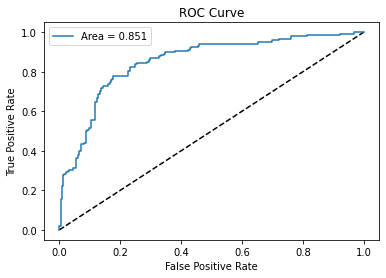

In [ ]:
y_pred_r=cnn_model_2nd.predict(ds_pneumonia_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_pneumonia_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# 6.   Transfer learning (Resnet)

In [ ]:
keras.backend.clear_session()

model_pretrained_2nd_r = resnet_get_pretrained()
model_pretrained_2nd_r.compile(loss='binary_crossentropy',
                         optimizer = keras.optimizers.Adam(learning_rate=5e-5),
                         metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

model_pretrained_2nd_r.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 58,594,049
Trainable params: 4,731,137
Non-trainable params: 53,862,912
_________________________________________

In [ ]:
log_dir="logs/fit/2nd/resnet/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-08 05:17:51.173692: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 05:17:51.173700: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 05:17:51.174078: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
history_r_2nd = model_pretrained_2nd_r.fit(ds_pneumonia_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_pneumonia_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_pneumonia_df)/BATCH),
          validation_steps=(len(val_pneumonia_df)/1));

Epoch 1/50


2022-08-08 05:17:53.382876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/126 [..............................] - ETA: 8:15 - loss: 0.6838 - auc: 0.5167 - binary_accuracy: 0.5000

2022-08-08 05:17:55.542265: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 05:17:55.542278: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


  2/126 [..............................] - ETA: 1:52 - loss: 0.7174 - auc: 0.5098 - binary_accuracy: 0.4375

2022-08-08 05:17:56.484572: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-08 05:17:56.485124: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-08 05:17:56.485841: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/resnet/20220808-051751/train/plugins/profile/2022_08_08_05_17_56

2022-08-08 05:17:56.486780: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/2nd/resnet/20220808-051751/train/plugins/profile/2022_08_08_05_17_56/ImbaJades-MBP.local.trace.json.gz
2022-08-08 05:17:56.487358: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/resnet/20220808-051751/train/plugins/profile/2022_08_08_05_17_56

2022-08-08 05:17:56.487479: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/fit/2nd

127/126 [==============================] - ETA: 0s - loss: 0.6103 - auc: 0.7280 - binary_accuracy: 0.6695

2022-08-08 05:19:32.327276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - 130s 998ms/step - loss: 0.6103 - auc: 0.7280 - binary_accuracy: 0.6695 - val_loss: 0.5694 - val_auc: 0.7556 - val_binary_accuracy: 0.7259
Epoch 2/50
126/126 [==============================] - 124s 973ms/step - loss: 0.5656 - auc: 0.7809 - binary_accuracy: 0.7172 - val_loss: 0.5561 - val_auc: 0.7813 - val_binary_accuracy: 0.7349
Epoch 3/50
126/126 [==============================] - 129s 1s/step - loss: 0.5391 - auc: 0.8047 - binary_accuracy: 0.7382 - val_loss: 0.5944 - val_auc: 0.7950 - val_binary_accuracy: 0.7117
Epoch 4/50
126/126 [==============================] - 124s 975ms/step - loss: 0.5267 - auc: 0.8161 - binary_accuracy: 0.7443 - val_loss: 0.5622 - val_auc: 0.7926 - val_binary_accuracy: 0.7272

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 5/50
126/126 [==============================] - 124s 976ms/step - loss: 0.5204 - auc: 0.8213 - binary_accuracy: 0.7446 - val_loss: 0.5422 - val_auc: 0.7933 - v

In [ ]:
score = model_pretrained_2nd_r.evaluate(ds_pneumonia_test, steps = len(df_pneumonia_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.31291791796684265
Test auc: 0.9568350315093994
Test accuracy: 0.9230769276618958


In [ ]:
score = model_pretrained_2nd_r.evaluate(ds_pneumonia_val, steps = len(val_pneumonia_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.5234723687171936
Val auc: 0.8009286522865295
Val accuracy: 0.7580437660217285


In [ ]:
y_pred = np.round(model_pretrained_2nd_r.predict(ds_pneumonia_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_pneumonia_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_pneumonia_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_pneumonia_test.labels, y_pred_))

2022-08-08 05:46:11.927288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.888888888888889
Precision-Score:  0.9836065573770492
Recall-Score:  0.8108108108108109


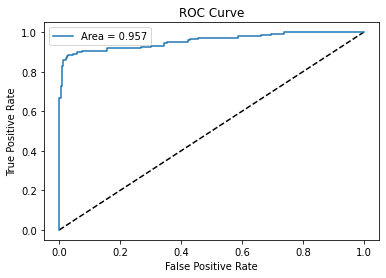

In [ ]:
y_pred_r=model_pretrained_2nd_r.predict(ds_pneumonia_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_pneumonia_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Fine Tuning(Resnet)

In [ ]:
base_model_r.trainable = True

for layer in base_model_r.layers[:-13]:
    layer.trainable = False

model_pretrained_2nd_r_ft = resnet_get_pretrained()

model_pretrained_2nd_r_ft.compile(loss='binary_crossentropy',
                         optimizer = keras.optimizers.Adam(learning_rate=1e-6), # very low learning rate
                         metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

model_pretrained_2nd_r_ft.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 58,594,049
Trainable params: 4,731,137
Non-trainable params: 53,862,912
_______________________________________

In [ ]:
log_dir="logs/fit/2nd/resnet_ft/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-08 05:46:37.340318: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 05:46:37.340326: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 05:46:37.340543: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
history_2nd_r_ft = model_pretrained_2nd_r_ft.fit(ds_pneumonia_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_pneumonia_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_pneumonia_df)/BATCH),
          validation_steps=(len(val_pneumonia_df)/1))

Epoch 1/50


2022-08-08 05:46:39.935524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/126 [..............................] - ETA: 9:11 - loss: 0.7466 - auc: 0.4275 - binary_accuracy: 0.4688

2022-08-08 05:46:42.515626: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 05:46:42.515642: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


  2/126 [..............................] - ETA: 1:54 - loss: 0.7548 - auc: 0.4030 - binary_accuracy: 0.4844

2022-08-08 05:46:43.658723: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-08 05:46:43.659315: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-08 05:46:43.659995: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/resnet_ft/20220808-054637/train/plugins/profile/2022_08_08_05_46_43

2022-08-08 05:46:43.663337: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/2nd/resnet_ft/20220808-054637/train/plugins/profile/2022_08_08_05_46_43/ImbaJades-MBP.local.trace.json.gz
2022-08-08 05:46:43.663967: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/resnet_ft/20220808-054637/train/plugins/profile/2022_08_08_05_46_43

2022-08-08 05:46:43.664115: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to log

127/126 [==============================] - ETA: 0s - loss: 0.7257 - auc: 0.4760 - binary_accuracy: 0.4847

2022-08-08 05:48:20.784698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - 133s 1s/step - loss: 0.7257 - auc: 0.4760 - binary_accuracy: 0.4847 - val_loss: 0.7228 - val_auc: 0.5404 - val_binary_accuracy: 0.4762
Epoch 2/50
126/126 [==============================] - 124s 973ms/step - loss: 0.6960 - auc: 0.5556 - binary_accuracy: 0.5401 - val_loss: 0.6874 - val_auc: 0.6032 - val_binary_accuracy: 0.5547
Epoch 3/50
126/126 [==============================] - 124s 973ms/step - loss: 0.6733 - auc: 0.6169 - binary_accuracy: 0.5810 - val_loss: 0.6637 - val_auc: 0.6488 - val_binary_accuracy: 0.6023
Epoch 4/50
126/126 [==============================] - 124s 973ms/step - loss: 0.6524 - auc: 0.6700 - binary_accuracy: 0.6305 - val_loss: 0.6427 - val_auc: 0.6813 - val_binary_accuracy: 0.6396
Epoch 5/50
126/126 [==============================] - 123s 972ms/step - loss: 0.6372 - auc: 0.7006 - binary_accuracy: 0.6502 - val_loss: 0.6295 - val_auc: 0.7027 - val_binary_accuracy: 0.6692
Epoch 6/50
126/126 [==============================] - 

In [ ]:
score = model_pretrained_2nd_r_ft.evaluate(ds_pneumonia_test, steps = len(df_pneumonia_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.3847155272960663
Test auc: 0.9422885179519653
Test accuracy: 0.8948718309402466


In [ ]:
score = model_pretrained_2nd_r_ft.evaluate(ds_pneumonia_val, steps = len(val_pneumonia_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.549385130405426
Val auc: 0.7761027812957764
Val accuracy: 0.7323037385940552


In [ ]:
y_pred = np.round(model_pretrained_2nd_r_ft.predict(ds_pneumonia_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_pneumonia_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_pneumonia_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_pneumonia_test.labels, y_pred_))

2022-08-08 06:48:35.585809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.8551236749116607
Precision-Score:  0.8962962962962963
Recall-Score:  0.8175675675675675


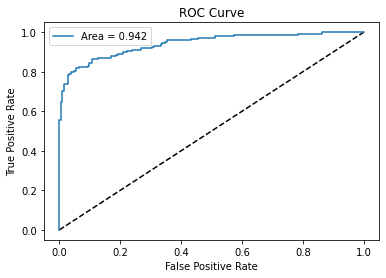

In [ ]:
y_pred_r=model_pretrained_2nd_r_ft.predict(ds_pneumonia_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_pneumonia_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Transfer Learning(inception)

In [ ]:
keras.backend.clear_session()

model_pretrained_2nd_i = inception_get_pretrained()
model_pretrained_2nd_i.compile(loss='binary_crossentropy',
                           optimizer = keras.optimizers.Adam(learning_rate=5e-5),
                           metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

model_pretrained_2nd_i.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 22,065,185
Trainable params: 656,513
Non-trainable params: 21,408,672
___________________________________________

In [ ]:
log_dir="logs/fit/2nd/inception/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-08 06:49:03.195525: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 06:49:03.195533: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 06:49:03.195688: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
history_2nd_i = model_pretrained_2nd_i.fit(ds_pneumonia_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_pneumonia_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_pneumonia_df)/BATCH),
          validation_steps=(len(val_pneumonia_df)/1));

Epoch 1/50


2022-08-08 06:49:04.531274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/126 [..............................] - ETA: 5:31 - loss: 0.8668 - auc: 0.3765 - binary_accuracy: 0.4062

2022-08-08 06:49:06.278282: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 06:49:06.278296: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


  2/126 [..............................] - ETA: 36s - loss: 0.8202 - auc: 0.3138 - binary_accuracy: 0.3906 

2022-08-08 06:49:06.806467: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-08 06:49:06.807093: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-08 06:49:06.807922: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/inception/20220808-064903/train/plugins/profile/2022_08_08_06_49_06

2022-08-08 06:49:06.809701: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/2nd/inception/20220808-064903/train/plugins/profile/2022_08_08_06_49_06/ImbaJades-MBP.local.trace.json.gz
2022-08-08 06:49:06.810411: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/inception/20220808-064903/train/plugins/profile/2022_08_08_06_49_06

2022-08-08 06:49:06.810605: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to log

127/126 [==============================] - ETA: 0s - loss: 0.6555 - auc: 0.6679 - binary_accuracy: 0.6236

2022-08-08 06:49:40.206063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - 51s 387ms/step - loss: 0.6555 - auc: 0.6679 - binary_accuracy: 0.6236 - val_loss: 0.6764 - val_auc: 0.7297 - val_binary_accuracy: 0.5830
Epoch 2/50
126/126 [==============================] - 44s 348ms/step - loss: 0.5952 - auc: 0.7507 - binary_accuracy: 0.6961 - val_loss: 0.5802 - val_auc: 0.7615 - val_binary_accuracy: 0.7169
Epoch 3/50
126/126 [==============================] - 44s 348ms/step - loss: 0.5829 - auc: 0.7638 - binary_accuracy: 0.6998 - val_loss: 0.5989 - val_auc: 0.7715 - val_binary_accuracy: 0.6976
Epoch 4/50
126/126 [==============================] - 44s 348ms/step - loss: 0.5626 - auc: 0.7859 - binary_accuracy: 0.7281 - val_loss: 0.5491 - val_auc: 0.7875 - val_binary_accuracy: 0.7516
Epoch 5/50
126/126 [==============================] - 44s 349ms/step - loss: 0.5598 - auc: 0.7867 - binary_accuracy: 0.7185 - val_loss: 0.5473 - val_auc: 0.7925 - val_binary_accuracy: 0.7516
Epoch 6/50
126/126 [==============================] - 44

In [ ]:
score = model_pretrained_2nd_i.evaluate(ds_pneumonia_test, steps = len(df_pneumonia_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.3652645945549011
Test auc: 0.9400129318237305
Test accuracy: 0.8871794939041138


In [ ]:
score = model_pretrained_2nd_i.evaluate(ds_pneumonia_val, steps = len(val_pneumonia_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.5200505256652832
Val auc: 0.7980636358261108
Val accuracy: 0.7451737523078918


In [ ]:
y_pred = np.round(model_pretrained_2nd_i.predict(ds_pneumonia_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_pneumonia_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_pneumonia_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_pneumonia_test.labels, y_pred_))

2022-08-08 06:59:24.534213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.8320610687022901
Precision-Score:  0.956140350877193
Recall-Score:  0.7364864864864865


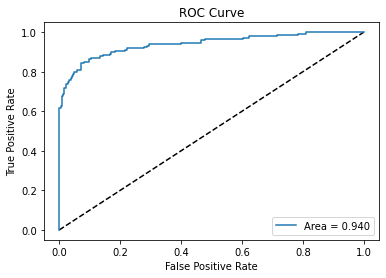

In [ ]:
y_pred_r=model_pretrained_2nd_i.predict(ds_pneumonia_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_pneumonia_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Fine Tuning(inception)

In [ ]:
base_model_i.trainable = True

for layer in base_model_i.layers[:-13]:
    layer.trainable = False
    
model_pretrained_2nd_i_ft = inception_get_pretrained()

model_pretrained_2nd_i_ft.compile(loss='binary_crossentropy',
                         optimizer = keras.optimizers.Adam(learning_rate=1e-6), # very low learning rate
                         metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

model_pretrained_2nd_i_ft.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 22,065,185
Trainable params: 656,513
Non-trainable params: 21,408,672
_________________________________________

In [ ]:
log_dir="logs/fit/2nd/inception_ft/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-08 11:51:50.794481: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 11:51:50.794498: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 11:51:50.794874: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
history_2nd_i_ft = model_pretrained_2nd_i_ft.fit(ds_pneumonia_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_pneumonia_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_pneumonia_df)/BATCH),
          validation_steps=(len(val_pneumonia_df)/1));

Epoch 1/50


2022-08-08 11:51:53.181096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  2/126 [..............................] - ETA: 30s - loss: 0.7180 - auc: 0.4897 - binary_accuracy: 0.5000 

2022-08-08 11:51:54.282612: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 11:51:54.282625: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 11:51:54.562918: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-08 11:51:54.563482: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-08 11:51:54.564191: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/inception_ft/20220808-115150/train/plugins/profile/2022_08_08_11_51_54

2022-08-08 11:51:54.564718: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/2nd/inception_ft/20220808-115150/train/plugins/profile/2022_08_08_11_51_54/ImbaJades-MBP.local.trace.json.gz
2022-08-08 11:51:54.565367: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directo

127/126 [==============================] - ETA: 0s - loss: 0.7037 - auc: 0.5481 - binary_accuracy: 0.5318

2022-08-08 11:52:28.578648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - 50s 384ms/step - loss: 0.7037 - auc: 0.5481 - binary_accuracy: 0.5318 - val_loss: 0.7584 - val_auc: 0.5418 - val_binary_accuracy: 0.4389
Epoch 2/50
126/126 [==============================] - 44s 344ms/step - loss: 0.6963 - auc: 0.5626 - binary_accuracy: 0.5436 - val_loss: 0.7506 - val_auc: 0.5489 - val_binary_accuracy: 0.4427
Epoch 3/50
126/126 [==============================] - 44s 343ms/step - loss: 0.6887 - auc: 0.5791 - binary_accuracy: 0.5562 - val_loss: 0.7384 - val_auc: 0.5624 - val_binary_accuracy: 0.4492
Epoch 4/50
126/126 [==============================] - 44s 344ms/step - loss: 0.6856 - auc: 0.5889 - binary_accuracy: 0.5665 - val_loss: 0.7338 - val_auc: 0.5751 - val_binary_accuracy: 0.4620
Epoch 5/50
126/126 [==============================] - 44s 346ms/step - loss: 0.6720 - auc: 0.6198 - binary_accuracy: 0.5882 - val_loss: 0.7212 - val_auc: 0.5875 - val_binary_accuracy: 0.4968
Epoch 6/50
126/126 [==============================] - 44

In [ ]:
score = model_pretrained_2nd_i_ft.evaluate(ds_pneumonia_test, steps = len(df_pneumonia_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.5555498600006104
Test auc: 0.8615005612373352
Test accuracy: 0.7923077344894409


In [ ]:
score = model_pretrained_2nd_i_ft.evaluate(ds_pneumonia_val, steps = len(val_pneumonia_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.6372148394584656
Val auc: 0.6926352977752686
Val accuracy: 0.6499356627464294


In [ ]:
y_pred = np.round(model_pretrained_2nd_i_ft.predict(ds_pneumonia_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_pneumonia_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_pneumonia_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_pneumonia_test.labels, y_pred_))

2022-08-08 12:18:54.955467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.7395498392282958
Precision-Score:  0.7055214723926381
Recall-Score:  0.777027027027027


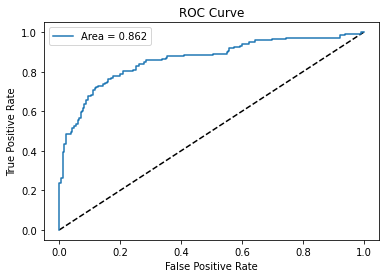

In [ ]:
y_pred_r=model_pretrained_2nd_i_ft.predict(ds_pneumonia_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_pneumonia_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Transfer Learning(VGG)

In [ ]:
keras.backend.clear_session()

base_model_v.trainable = False
model_pretrained_2nd_v = vgg_get_pretrained()
model_pretrained_2nd_v.compile(loss='binary_crossentropy',
                           optimizer = keras.optimizers.Adam(learning_rate=5e-5),
                           metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

model_pretrained_2nd_v.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 14,780,481
Trainable params: 65,793
Non-trainable params: 14,714,688
____________________________________________

In [ ]:
log_dir="logs/fit/2nd/vgg/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-08 12:19:06.757362: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 12:19:06.757369: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 12:19:06.757664: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
history_2nd_v = model_pretrained_2nd_v.fit(ds_pneumonia_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_pneumonia_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_pneumonia_df)/BATCH),
          validation_steps=(len(val_pneumonia_df)/1));

Epoch 1/50


2022-08-08 12:19:07.254232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/126 [..............................] - ETA: 2:58 - loss: 0.7539 - auc: 0.3710 - binary_accuracy: 0.5000

2022-08-08 12:19:08.472346: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 12:19:08.472356: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


  2/126 [..............................] - ETA: 1:09 - loss: 0.7837 - auc: 0.3286 - binary_accuracy: 0.4375

2022-08-08 12:19:09.144714: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-08 12:19:09.145272: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-08 12:19:09.146056: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/vgg/20220808-121906/train/plugins/profile/2022_08_08_12_19_09

2022-08-08 12:19:09.148234: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/2nd/vgg/20220808-121906/train/plugins/profile/2022_08_08_12_19_09/ImbaJades-MBP.local.trace.json.gz
2022-08-08 12:19:09.149079: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/vgg/20220808-121906/train/plugins/profile/2022_08_08_12_19_09

2022-08-08 12:19:09.149853: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/fit/2nd/vgg/2022

127/126 [==============================] - ETA: 0s - loss: 0.7126 - auc: 0.4814 - binary_accuracy: 0.4830

2022-08-08 12:20:15.074584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - 85s 663ms/step - loss: 0.7126 - auc: 0.4814 - binary_accuracy: 0.4830 - val_loss: 0.6886 - val_auc: 0.6344 - val_binary_accuracy: 0.5972
Epoch 2/50
126/126 [==============================] - 83s 657ms/step - loss: 0.6801 - auc: 0.5904 - binary_accuracy: 0.5677 - val_loss: 0.7029 - val_auc: 0.6823 - val_binary_accuracy: 0.4981
Epoch 3/50
126/126 [==============================] - 84s 657ms/step - loss: 0.6616 - auc: 0.6458 - binary_accuracy: 0.6076 - val_loss: 0.6574 - val_auc: 0.7227 - val_binary_accuracy: 0.6538
Epoch 4/50
126/126 [==============================] - 84s 658ms/step - loss: 0.6503 - auc: 0.6748 - binary_accuracy: 0.6291 - val_loss: 0.6894 - val_auc: 0.7187 - val_binary_accuracy: 0.5354
Epoch 5/50
126/126 [==============================] - 83s 657ms/step - loss: 0.6421 - auc: 0.6910 - binary_accuracy: 0.6456 - val_loss: 0.6772 - val_auc: 0.7338 - val_binary_accuracy: 0.5598

Epoch 00005: ReduceLROnPlateau reducing learning rate t

In [ ]:
score = model_pretrained_2nd_v.evaluate(ds_pneumonia_test, steps = len(df_pneumonia_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.6325203776359558
Test auc: 0.8253296613693237
Test accuracy: 0.764102578163147


In [ ]:
score = model_pretrained_2nd_v.evaluate(ds_pneumonia_val, steps = len(val_pneumonia_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.6573991179466248
Val auc: 0.7227299809455872
Val accuracy: 0.6537966728210449


In [ ]:
y_pred = np.round(model_pretrained_2nd_v.predict(ds_pneumonia_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_pneumonia_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_pneumonia_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_pneumonia_test.labels, y_pred_))

2022-08-08 12:30:45.030984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.7228915662650603
Precision-Score:  0.6521739130434783
Recall-Score:  0.8108108108108109


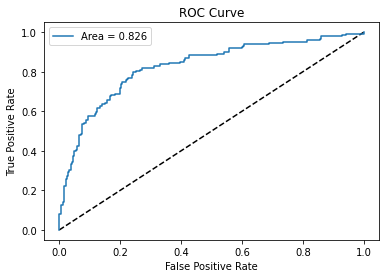

In [ ]:
y_pred_r=model_pretrained_2nd_v.predict(ds_pneumonia_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_pneumonia_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Fine Tuning(VGG)

In [ ]:
base_model_v.trainable = True

for layer in base_model_v.layers[:-13]:
    layer.trainable = False
model_pretrained_2nd_v_ft = vgg_get_pretrained()
model_pretrained_2nd_v_ft.compile(loss='binary_crossentropy',
                         optimizer = keras.optimizers.Adam(learning_rate=1e-6), # very low learning rate
                         metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

model_pretrained_2nd_v_ft.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 14,780,481
Trainable params: 14,520,321
Non-trainable params: 260,160
_________________________________________

In [ ]:
log_dir="logs/fit/2nd/vgg_ft/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-08 12:30:59.635221: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 12:30:59.635230: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 12:30:59.635450: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
ft_v_2nd_history = model_pretrained_2nd_v_ft.fit(ds_pneumonia_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_pneumonia_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_pneumonia_df)/BATCH),
          validation_steps=(len(val_pneumonia_df)/1))

Epoch 1/50


2022-08-08 12:31:00.193289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/126 [..............................] - ETA: 4:23 - loss: 1.2645 - auc: 0.4510 - binary_accuracy: 0.4688

2022-08-08 12:31:02.069930: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 12:31:02.069951: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


  2/126 [..............................] - ETA: 3:08 - loss: 1.1482 - auc: 0.5093 - binary_accuracy: 0.5156

2022-08-08 12:31:03.630154: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-08 12:31:03.630797: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-08 12:31:03.631597: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/vgg_ft/20220808-123059/train/plugins/profile/2022_08_08_12_31_03

2022-08-08 12:31:03.633705: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/2nd/vgg_ft/20220808-123059/train/plugins/profile/2022_08_08_12_31_03/ImbaJades-MBP.local.trace.json.gz
2022-08-08 12:31:03.634442: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/vgg_ft/20220808-123059/train/plugins/profile/2022_08_08_12_31_03

2022-08-08 12:31:03.634633: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/fit/2nd

127/126 [==============================] - ETA: 0s - loss: 0.7548 - auc: 0.5179 - binary_accuracy: 0.5108

2022-08-08 12:34:06.918177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - 204s 2s/step - loss: 0.7548 - auc: 0.5179 - binary_accuracy: 0.5108 - val_loss: 0.6793 - val_auc: 0.6661 - val_binary_accuracy: 0.6100
Epoch 2/50
126/126 [==============================] - 203s 2s/step - loss: 0.6755 - auc: 0.6088 - binary_accuracy: 0.5850 - val_loss: 0.6652 - val_auc: 0.7082 - val_binary_accuracy: 0.6860
Epoch 3/50
126/126 [==============================] - 203s 2s/step - loss: 0.6508 - auc: 0.6767 - binary_accuracy: 0.6374 - val_loss: 0.6523 - val_auc: 0.7271 - val_binary_accuracy: 0.6641
Epoch 4/50
126/126 [==============================] - 203s 2s/step - loss: 0.6257 - auc: 0.7164 - binary_accuracy: 0.6653 - val_loss: 0.6114 - val_auc: 0.7605 - val_binary_accuracy: 0.6937
Epoch 5/50
126/126 [==============================] - 203s 2s/step - loss: 0.6101 - auc: 0.7345 - binary_accuracy: 0.6842 - val_loss: 0.6040 - val_auc: 0.7689 - val_binary_accuracy: 0.6976
Epoch 6/50
126/126 [==============================] - 203s 2s/step

In [ ]:
score = model_pretrained_2nd_v_ft.evaluate(ds_pneumonia_val, steps = len(val_pneumonia_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.5408927202224731
Val auc: 0.7865380644798279
Val accuracy: 0.7503217458724976


In [ ]:
score = model_pretrained_2nd_v_ft.evaluate(ds_pneumonia_test, steps = len(df_pneumonia_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.4030589163303375
Test auc: 0.9391474723815918
Test accuracy: 0.920512855052948


In [ ]:
y_pred = np.round(model_pretrained_2nd_v_ft.predict(ds_pneumonia_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_pneumonia_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_pneumonia_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_pneumonia_test.labels, y_pred_))

2022-08-08 13:18:56.163869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.8838951310861423
Precision-Score:  0.9915966386554622
Recall-Score:  0.7972972972972973


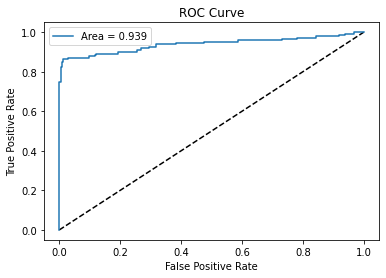

In [ ]:
y_pred_r=model_pretrained_2nd_v_ft.predict(ds_pneumonia_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_pneumonia_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# resnet transfer after fine tuning in dataset 1

In [ ]:
transfer_data1_resnet = Model(inputs = model_pretrained_r_ft.input,
            outputs = model_pretrained_r_ft.layers[-4].output)

In [ ]:
transfer_data1_resnet.trainable = False

In [ ]:
transfer_data1_resnet.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
Total params: 58,331,648
Trainable params: 0
Non-trainable params: 58,331,648
_________________________________________________________________


In [ ]:
def test_get_pretrained():
    
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = transfer_data1_resnet(inputs)

    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    # ouput layer
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [ ]:
keras.backend.clear_session()

transfer_set1_model = test_get_pretrained()
transfer_set1_model.compile(loss='binary_crossentropy',
                           optimizer = keras.optimizers.Adam(learning_rate=5e-5),
                           metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

transfer_set1_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
model_2 (Functional)         (None, 2048)              58331648  
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 58,594,049
Trainable params: 262,401
Non-trainable params: 58,331,648
_________________________________________________________________


In [ ]:
log_dir="logs/fit/2nd/transfer_resnet/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-08 13:19:11.236438: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 13:19:11.236447: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 13:19:11.236552: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
transfer_set1_history = transfer_set1_model.fit(ds_pneumonia_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_pneumonia_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_pneumonia_df)/BATCH),
          validation_steps=(len(val_pneumonia_df)/1));

Epoch 1/50


2022-08-08 13:19:13.630684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/126 [..............................] - ETA: 7:42 - loss: 0.7393 - auc: 0.4881 - binary_accuracy: 0.5000

2022-08-08 13:19:15.392915: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 13:19:15.392929: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


  2/126 [..............................] - ETA: 1:41 - loss: 0.7430 - auc: 0.4851 - binary_accuracy: 0.5000

2022-08-08 13:19:16.243065: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-08 13:19:16.243575: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-08 13:19:16.244284: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/transfer_resnet/20220808-131911/train/plugins/profile/2022_08_08_13_19_16

2022-08-08 13:19:16.245205: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/2nd/transfer_resnet/20220808-131911/train/plugins/profile/2022_08_08_13_19_16/ImbaJades-MBP.local.trace.json.gz
2022-08-08 13:19:16.245761: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/transfer_resnet/20220808-131911/train/plugins/profile/2022_08_08_13_19_16

2022-08-08 13:19:16.245907: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_prof

127/126 [==============================] - ETA: 0s - loss: 0.6500 - auc: 0.6685 - binary_accuracy: 0.6227

2022-08-08 13:20:43.408965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - 119s 919ms/step - loss: 0.6500 - auc: 0.6685 - binary_accuracy: 0.6227 - val_loss: 0.6182 - val_auc: 0.7363 - val_binary_accuracy: 0.6615
Epoch 2/50
126/126 [==============================] - 114s 898ms/step - loss: 0.6006 - auc: 0.7446 - binary_accuracy: 0.6921 - val_loss: 0.5748 - val_auc: 0.7574 - val_binary_accuracy: 0.7207
Epoch 3/50
126/126 [==============================] - 113s 892ms/step - loss: 0.5849 - auc: 0.7634 - binary_accuracy: 0.7113 - val_loss: 0.5727 - val_auc: 0.7655 - val_binary_accuracy: 0.7143
Epoch 4/50
126/126 [==============================] - 113s 892ms/step - loss: 0.5747 - auc: 0.7712 - binary_accuracy: 0.7089 - val_loss: 0.5707 - val_auc: 0.7701 - val_binary_accuracy: 0.7156
Epoch 5/50
126/126 [==============================] - 113s 894ms/step - loss: 0.5733 - auc: 0.7733 - binary_accuracy: 0.7165 - val_loss: 0.5628 - val_auc: 0.7762 - val_binary_accuracy: 0.7246
Epoch 6/50
126/126 [==============================]

In [ ]:
score = transfer_set1_model.evaluate(ds_pneumonia_test, steps = len(df_pneumonia_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.397426962852478
Test auc: 0.9375141263008118
Test accuracy: 0.884615421295166


In [ ]:
score = transfer_set1_model.evaluate(ds_pneumonia_val, steps = len(val_pneumonia_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.551128089427948
Val auc: 0.7863917350769043
Val accuracy: 0.7361647486686707


In [ ]:
y_pred = np.round(transfer_set1_model.predict(ds_pneumonia_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_pneumonia_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_pneumonia_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_pneumonia_test.labels, y_pred_))

2022-08-08 13:45:10.382396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.8464163822525598
Precision-Score:  0.8551724137931035
Recall-Score:  0.8378378378378378


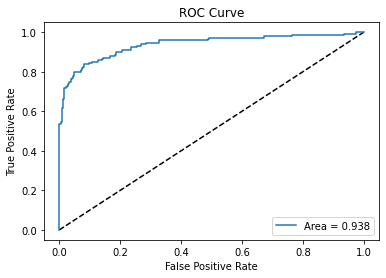

In [ ]:
y_pred_r=transfer_set1_model.predict(ds_pneumonia_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_pneumonia_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# vgg transfer after fine tuning in dataset 1

In [ ]:
transfer_data1_vgg = Model(inputs = model_pretrained_v_ft.input,
            outputs = model_pretrained_v_ft.layers[-4].output)

In [ ]:
transfer_data1_vgg.trainable = False

In [ ]:
transfer_data1_vgg.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
def transfer_vgg_get_pretrained():
    
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = transfer_data1_vgg(inputs)

    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    # output layer
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [ ]:
keras.backend.clear_session()

transfer_vgg_model = transfer_vgg_get_pretrained()
transfer_vgg_model.compile(loss='binary_crossentropy',
                           optimizer = keras.optimizers.Adam(learning_rate=5e-5),
                           metrics=[tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.binary_accuracy])

transfer_vgg_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
model_1 (Functional)         (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 14,780,481
Trainable params: 65,793
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
log_dir="logs/fit/2nd/transfer_vgg/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-08-08 13:45:34.411589: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 13:45:34.411600: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-08 13:45:34.412023: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [ ]:
transfer_set1_history = transfer_vgg_model.fit(ds_pneumonia_train,
          batch_size = BATCH,
          epochs = 50,
          validation_data=ds_pneumonia_val,
          callbacks=[early_stopping, plateau, tensorboard_callback],
          steps_per_epoch=(len(train_pneumonia_df)/BATCH),
          validation_steps=(len(val_pneumonia_df)/1));

Epoch 1/50


2022-08-08 13:45:34.907357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/126 [..............................] - ETA: 2:58 - loss: 0.6759 - auc: 0.6176 - binary_accuracy: 0.6250

2022-08-08 13:45:36.132510: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-08 13:45:36.132529: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.


  2/126 [..............................] - ETA: 1:09 - loss: 0.6954 - auc: 0.5748 - binary_accuracy: 0.5469

2022-08-08 13:45:36.888392: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-08 13:45:36.888955: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-08 13:45:36.889654: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/transfer_vgg/20220808-134534/train/plugins/profile/2022_08_08_13_45_36

2022-08-08 13:45:36.891736: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/2nd/transfer_vgg/20220808-134534/train/plugins/profile/2022_08_08_13_45_36/ImbaJades-MBP.local.trace.json.gz
2022-08-08 13:45:36.892442: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2nd/transfer_vgg/20220808-134534/train/plugins/profile/2022_08_08_13_45_36

2022-08-08 13:45:36.892721: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.

127/126 [==============================] - ETA: 0s - loss: 0.6562 - auc: 0.6586 - binary_accuracy: 0.6192

2022-08-08 13:46:42.980196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - 85s 665ms/step - loss: 0.6562 - auc: 0.6586 - binary_accuracy: 0.6192 - val_loss: 0.6408 - val_auc: 0.7603 - val_binary_accuracy: 0.6512
Epoch 2/50
126/126 [==============================] - 84s 658ms/step - loss: 0.6066 - auc: 0.7369 - binary_accuracy: 0.6796 - val_loss: 0.5790 - val_auc: 0.7714 - val_binary_accuracy: 0.7503
Epoch 3/50
126/126 [==============================] - 84s 659ms/step - loss: 0.5845 - auc: 0.7613 - binary_accuracy: 0.6973 - val_loss: 0.5707 - val_auc: 0.7704 - val_binary_accuracy: 0.7465
Epoch 4/50
126/126 [==============================] - 84s 658ms/step - loss: 0.5869 - auc: 0.7589 - binary_accuracy: 0.7079 - val_loss: 0.5561 - val_auc: 0.7692 - val_binary_accuracy: 0.7529
Epoch 5/50
126/126 [==============================] - 85s 666ms/step - loss: 0.5850 - auc: 0.7597 - binary_accuracy: 0.7059 - val_loss: 0.5503 - val_auc: 0.7706 - val_binary_accuracy: 0.7555
Epoch 6/50
126/126 [==============================] - 84

In [ ]:
score = transfer_vgg_model.evaluate(ds_pneumonia_test, steps = len(df_pneumonia_test), verbose = 0)

print('Test loss:', score[0])
print('Test auc:', score[1])
print('Test accuracy:', score[2])

Test loss: 0.3720230162143707
Test auc: 0.9278535842895508
Test accuracy: 0.9179487228393555


In [ ]:
score = transfer_vgg_model.evaluate(ds_pneumonia_val, steps = len(val_pneumonia_df), verbose = 0)

print('Val loss:', score[0])
print('Val auc:', score[1])
print('Val accuracy:', score[2])

Val loss: 0.5287858247756958
Val auc: 0.7847964763641357
Val accuracy: 0.7567567825317383


In [ ]:
y_pred = np.round(transfer_vgg_model.predict(ds_pneumonia_test, verbose=0))

y_pred_ = []
for i in range(len(y_pred)):
    y_pred_.append(y_pred[i][0])

print('F1-Score: ', f1_score(ds_pneumonia_test.labels, y_pred_))
print('Precision-Score: ', precision_score(ds_pneumonia_test.labels, y_pred_))
print('Recall-Score: ', recall_score(ds_pneumonia_test.labels, y_pred_))

2022-08-08 14:09:53.035075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


F1-Score:  0.8796992481203008
Precision-Score:  0.9915254237288136
Recall-Score:  0.7905405405405406


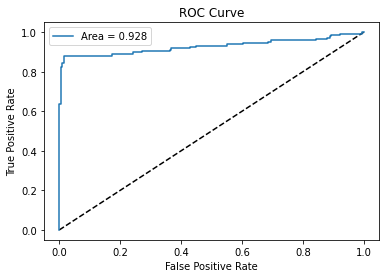

In [ ]:
y_pred_r=transfer_vgg_model.predict(ds_pneumonia_test, verbose=0).ravel()
fpr, tpr, thresholds = roc_curve(ds_pneumonia_test.labels, y_pred_r)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Summary

## Classification 1

In [ ]:
Model = ["CNNs", "VGG", 'VGG + FT', 'Inception', 'Inception + FT', 'Resnet', 'Resnet + FT']
Acc = [0.89, 0.839, 0.913, 0.836, 0.84, 0.919, 0.925]
F1 = [0.909, 0.887, 0.929, 0.817, 0.855, 0.909, 0.909]
Recall1 = [0.943, 0.887, 0.926, 0.756, 0.815, 0.877, 0.89]
Precision = [0.878, 0.887, 0.933, 0.888, 0.898, 0.95, 0.878]
MC = pd.DataFrame({'Model' : Model, 'F1 score': F1, 'Sensitivity (Recall)': Recall1, 'Precision':Precision, 'Accuracy':Acc})
MC

,Model,F1 score,Sensitivity (Recall),Precision,Accuracy
0,CNNs,0.909,0.943,0.878,0.890
1,VGG,0.887,0.887,0.887,0.839
2,VGG + FT,0.929,0.926,0.933,0.913
3,Inception,0.817,0.756,0.888,0.836
4,Inception + FT,0.855,0.815,0.898,0.840
5,Resnet,0.909,0.877,0.950,0.919
6,Resnet + FT,0.909,0.890,0.878,0.925


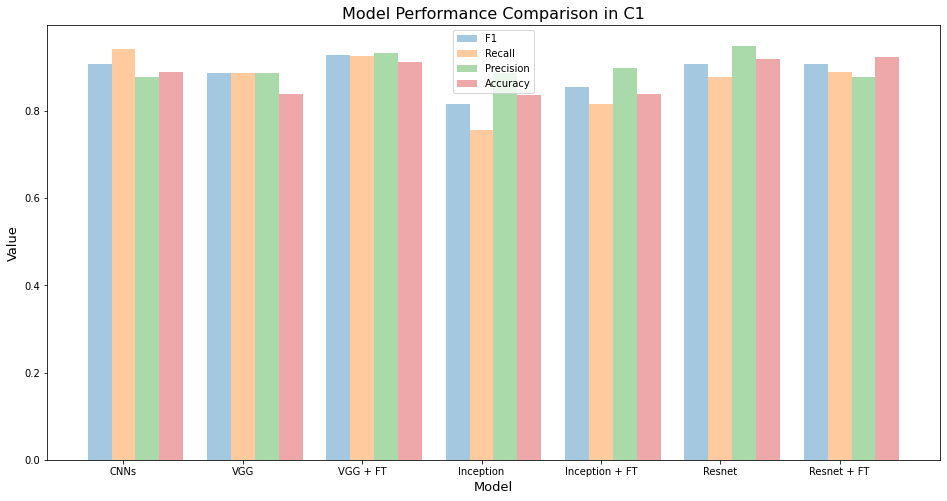

In [ ]:
n_groups = 7
fig, ax = plt.subplots(figsize = (16, 8))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.4


r1 = plt.bar(index, F1, bar_width,alpha=opacity,label='F1')

r2 = plt.bar(index + bar_width, Recall1, bar_width,alpha=opacity,label='Recall')

r3 = plt.bar(index + 2*bar_width, Precision, bar_width,alpha=opacity,label='Precision')

r4 = plt.bar(index + 3*bar_width, Acc, bar_width,alpha=opacity,label='Accuracy')

plt.xlabel('Model', fontsize = 13)
plt.ylabel('Value', fontsize = 13)
plt.title('Model Performance Comparison in C1', fontsize = 16)
plt.xticks(index + bar_width, ("CNNs", "VGG", 'VGG + FT', 'Inception', 'Inception + FT', 'Resnet', 'Resnet + FT'))
plt.legend()

#plt.tight_layout()
plt.show()

## Classification 2

In [ ]:
Model = ["CNNs", "VGG", 'VGG + FT', 'Inception', 'Inception + FT', 'Resnet', 'Resnet + FT', 'C1_Resnet', 'C1_VGG']
Acc = [0.87, 0.86, 0.87, 0.88, 0.84, 0.88, 0.87, 0.89, 0.918]
F1 = [0, 0.883, 0.886, 0.826, 0.787, 0.817, 0.83, 0.839, 0.879]
Recall1 = [0, 0.872, 0.865, 0.736, 0.763, 0.723, 0.811, 0.777, 0.790]
Precision = [0, 0.896, 0.908, 0.939, 0.813, 0.938, 0.851, 0.913, 0.991]
MC = pd.DataFrame({'Model' : Model, 'F1 score': F1, 'Sensitivity (Recall)': Recall1, 'Precision':Precision, 'Accuracy':Acc})
MC

,Model,F1 score,Sensitivity (Recall),Precision,Accuracy
0,CNNs,0.000,0.000,0.000,0.870
1,VGG,0.883,0.872,0.896,0.860
2,VGG + FT,0.886,0.865,0.908,0.870
3,Inception,0.826,0.736,0.939,0.880
4,Inception + FT,0.787,0.763,0.813,0.840
5,Resnet,0.817,0.723,0.938,0.880
6,Resnet + FT,0.830,0.811,0.851,0.870
7,C1_Resnet,0.839,0.777,0.913,0.890
8,C1_VGG,0.879,0.790,0.991,0.918


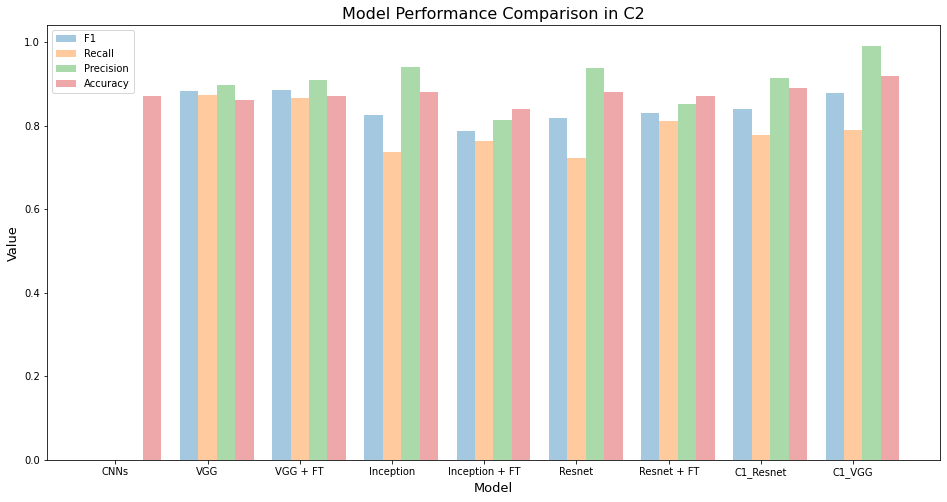

In [ ]:
n_groups = 9
fig, ax = plt.subplots(figsize = (16, 8))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.4


r1 = plt.bar(index, F1, bar_width,alpha=opacity,label='F1')

r2 = plt.bar(index + bar_width, Recall1, bar_width,alpha=opacity,label='Recall')

r3 = plt.bar(index + 2*bar_width, Precision, bar_width,alpha=opacity,label='Precision')

r4 = plt.bar(index + 3*bar_width, Acc, bar_width,alpha=opacity,label='Accuracy')

plt.xlabel('Model', fontsize = 13)
plt.ylabel('Value', fontsize = 13)
plt.title('Model Performance Comparison in C2', fontsize = 16)
plt.xticks(index + bar_width, ("CNNs", "VGG", 'VGG + FT', 'Inception', 'Inception + FT', 'Resnet', 'Resnet + FT', 'C1_Resnet', 'C1_VGG'))
plt.legend()

#plt.tight_layout()
plt.show()